1. Merging the Datasets

In [9]:
import pandas as pd

#Loading the Review Data
reviews = pd.read_json('IMDB_reviews.json',lines=True)
reviews.head()

#Loading the Movie Data
movies = pd.read_json('IMDB_movie_details.json',lines=True)
movies.head()


,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [21]:
#Merging the Movie and Review data on the common field 'movie_id'
merged_df = pd.merge(reviews, movies, on='movie_id', how='inner')

# Display the merged DataFrame
merged_df.head()
merged_df.shape


(573906, 13)

In [22]:
#Exporting the Merged Data as a CSV
merged_df.to_csv('Movie_Review_Dataset.csv')

KeyboardInterrupt: 

2. Exploratory Data Analysis (EDA)

In [2]:
#Installing necessary packages for text cleaning and preprocessing
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
#Loading the dataset
import pandas as pd
df = pd.read_csv('Movie_Review_Dataset.csv')
df.head()

,Unnamed: 0,review_date,movie_id,user_id,is_spoiler,review_text,rating_x,review_summary,plot_summary,duration,genre,rating_y,release_date,plot_synopsis
0,0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,"['Crime', 'Drama']",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
1,1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,2h 22min,"['Crime', 'Drama']",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film,Chronicles the experiences of a formerly succe...,2h 22min,"['Crime', 'Drama']",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
3,3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,Chronicles the experiences of a formerly succe...,2h 22min,"['Crime', 'Drama']",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
4,4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",Chronicles the experiences of a formerly succe...,2h 22min,"['Crime', 'Drama']",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463712 entries, 0 to 463711
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      463712 non-null  int64  
 1   review_date     463712 non-null  object 
 2   movie_id        463712 non-null  object 
 3   user_id         463712 non-null  object 
 4   is_spoiler      463712 non-null  bool   
 5   review_text     463712 non-null  object 
 6   rating_x        463712 non-null  int64  
 7   review_summary  463709 non-null  object 
 8   plot_summary    463712 non-null  object 
 9   duration        463712 non-null  object 
 10  genre           463712 non-null  object 
 11  rating_y        463712 non-null  float64
 12  release_date    463712 non-null  object 
 13  plot_synopsis   440151 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(10)
memory usage: 46.4+ MB
None
Unnamed: 0            0
review_date           0
movie_id              0
use

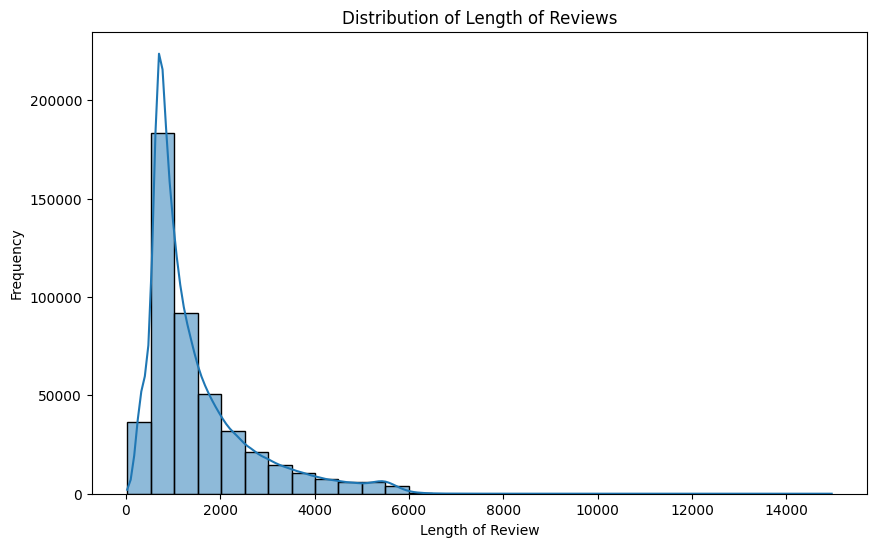

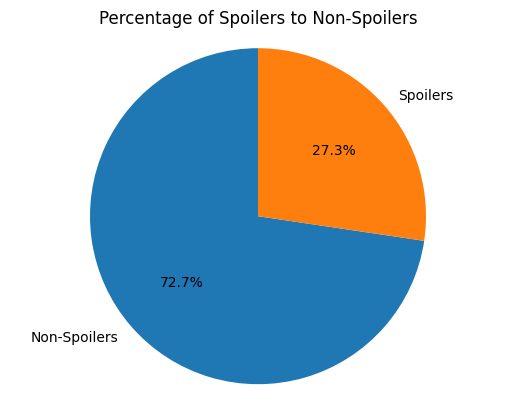

In [4]:
# Check for missing values and data types
print(df.info())
print(df.isnull().sum())

# Basic statistics of the dataset
print(df.describe())

# Distribution of Length of Reviews
df['review_length'] = df['review_text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title('Distribution of Length of Reviews')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.show()

#Pie Chart of Spoilers to Non Spoilers
spoiler_counts = df['is_spoiler'].value_counts()
spoiler_percentages = spoiler_counts / spoiler_counts.sum() * 100
labels = ['Non-Spoilers', 'Spoilers']
sizes = [spoiler_percentages[0], spoiler_percentages[1]]

# Create pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of Spoilers to Non-Spoilers')
plt.show()


3. Data Cleaning

In [10]:
#Convert reviewviewto lowercase
df['cleaned_review'] = df['review_text'].str.lower()

#Remove URLS
df['cleanereviewiew'] = df['cleanreviewview'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))

# Remove user mentions
df['clearevieweview'] = df['clereviewreview'].apply(lambda x: re.sub(r'@\w+', '', x))

# Remove hashtags
df['clreview_review'] = df['creviewd_review'].apply(lambda x: re.sub(r'#\w+', '', x))

# Remove punctuation
df['reviewed_review'] = df[reviewned_review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Remove numbers
dfreviewaned_review'] = drevieweaned_review'].apply(lambda x: re.sub(r'\d+', '', x))


In [11]:
df['cleaned_review']

0         in its oscar year shawshank redemption written...
1         the shawshank redemption is without a doubt on...
2         i believe that this film is the best story eve...
3         yes there are spoilers herethis film has had s...
4         at the heart of this extraordinary movie is a ...
                                ...                        
463707    thats a first for me and ive been going to the...
463708    i watched cloverfield few days ago and i have ...
463709    this film seriously disappointedthe acting was...
463710    this is what my friends and i were singing thr...
463711    okay this movie was about some people who went...
Name: cleaned_review, Length: 463712, dtype: object

4. Removing Stop Words and Lemmatization

In [12]:
#Download stopwords and wordnet
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

#Remove stop words
stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

df['cleaned_review'] = df['cleaned_review'].apply(lambda x: remove_stop_words(x))

#Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    word_tokens = word_tokenize(text)
    lemmatized_text = [lemmatizer.lemmatize(word) for word in word_tokens]
    return ' '.join(lemmatized_text)

df['cleaned_review'] = df['cleaned_review'].apply(lambda x: lemmatize_text(x))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [13]:
#display cleaned dataset
df.head()

,Unnamed: 0,review_date,movie_id,user_id,is_spoiler,review_text,rating_x,review_summary,plot_summary,duration,genre,rating_y,release_date,plot_synopsis,review_length,cleaned_tweet,cleaned_review
0,0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,"['Crime', 'Drama']",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",4751,in its oscar year shawshank redemption written...,oscar year shawshank redemption written direct...
1,1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,2h 22min,"['Crime', 'Drama']",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",1218,the shawshank redemption is without a doubt on...,shawshank redemption without doubt one brillia...
2,2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film,Chronicles the experiences of a formerly succe...,2h 22min,"['Crime', 'Drama']",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",1470,i believe that this film is the best story eve...,believe film best story ever told film im tell...
3,3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,Chronicles the experiences of a formerly succe...,2h 22min,"['Crime', 'Drama']",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",4096,yes there are spoilers herethis film has had s...,yes spoiler herethis film emotional impact fin...
4,4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",Chronicles the experiences of a formerly succe...,2h 22min,"['Crime', 'Drama']",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",4632,at the heart of this extraordinary movie is a ...,heart extraordinary movie brilliant indelible ...


In [14]:
#Saving Cleaned Dataset as a CSV
df.to_csv('cleaned_review.csv', index=False)